In [1]:
using Revise
using Plots

# レナードジョーンズポテンシャル
$$
U(r) = 4\epsilon\left[\left(\frac{\sigma}{r}\right)^p-\left(\frac{\sigma}{r}\right)^q\right]
$$
加わる力は
$$
F(r) = -\frac{d}{dr}U(r) = 4\epsilon\left(p\frac{\sigma^{p}}{r^{p+1}}-q\frac{\sigma^{q}}{r^{q+1}}\right)
$$

In [2]:
potential(r,ϵ,σ,p=12,q=6)=4ϵ*((σ/r)^p - (σ/r)^q)
force(r,ϵ,σ,p=12,q=6)=4ϵ/r*(p*(σ/r)^p - q*(σ/r)^q)

force (generic function with 3 methods)

## 原子モデル

In [3]:
mutable struct Atom
    x::Float64
    v::Float64
    m::Float64
end

### 希ガス分子に対するLennard-Jones パラメータ

|  | $\sigma$[nm] | $\epsilon$[J] | $\epsilon/k_{B}$[K] | m [kg] |
|:---:|:---:|:---:|:---:| :---:|
| Ne | 0.274 | $0.50 \times 10^{-21}$ | 36.2 |  
| Ar | 0.340 | $1.67 \times 10^{-21}$ | 121 |$6.634 \times 10^{-26}$|   
| Kr | 0.365 | $2.25 \times 10^{-21}$ | 163 |
| Xe | 0.398 | $3.20 \times 10^{-21}$ | 232 |  

### Argonの場合

In [4]:
ϵ = 1.67
σ = 0.34
m = 6.63e-3

f_ar(r) = force(r,ϵ,σ)

f_ar (generic function with 1 method)

# 速度Verlet
$$
a(t) = \frac{F(r(t))}{m} \\
r(t+\Delta t) = r(t) + v(t)\Delta t + \frac{1}{2}a(t)\Delta t^{2} \\
v(t+\Delta t) = v(t) + \frac{a(t)+a(t+\Delta t)}{2}\Delta t
$$

┌ Info: Saved animation to /Users/hitoshi/Julia/Lennard-Jones/double_LJ.gif
└ @ Plots /Users/hitoshi/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/Users/hitoshi/Julia/Lennard-Jones/double_LJ.gif")
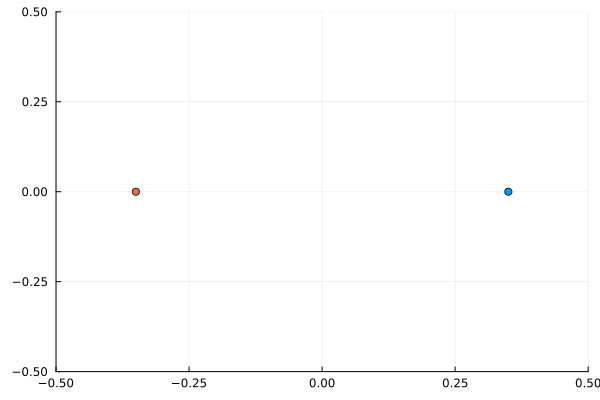

In [5]:

a1 = Atom(0.35,0.0,m)
a2 = Atom(-0.35,0.0,m)

Δt = 1e-6
n = 1e6
samp = 1000

anim = Animation()
for i=0:n
    if i%samp == 0
        plt = plot([a1.x],[0.0],st=:scatter,xlims=(-0.5,0.5),ylims=(-0.5,0.5),label="")
        plot!([a2.x],[0.0],st=:scatter,label="")
        frame(anim,plt)
    end
    acc1 = f_ar(a1.x-a2.x)/a1.m
    acc2 = f_ar(a2.x-a1.x)/a2.m
    a1.x += a1.v*Δt+acc1*Δt^2/2
    a2.x += a2.v*Δt+acc2*Δt^2/2
    acc_next1 = f_ar(a1.x-a2.x)/a1.m
    acc_next2 = f_ar(a2.x-a1.x)/a2.m
    a1.v += (acc1+acc_next1)/2*Δt
    a2.v += (acc2+acc_next2)/2*Δt

end
gif(anim,"double_LJ.gif",fps=30)